In [12]:
import pandas as pd
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw

In [39]:
df_ddr1_1M = pd.read_parquet("./data/ddr1_1M.parquet")
df_mapk14_1M = pd.read_parquet("./data/mapk14_1M.parquet")

In [30]:
df_ddr1_1M.shape


(1000000, 13)

In [13]:
df = pd.read_parquet("./ddr1_random.parquet")

df.tail()

,split1,split2,split3,split4,split5
999995,train,train,train,test,train
999996,train,train,train,train,train
999997,test,train,train,train,train
999998,train,train,train,test,train
999999,train,test,valid,train,train


<Axes: xlabel='target_enrichment', ylabel='Density'>

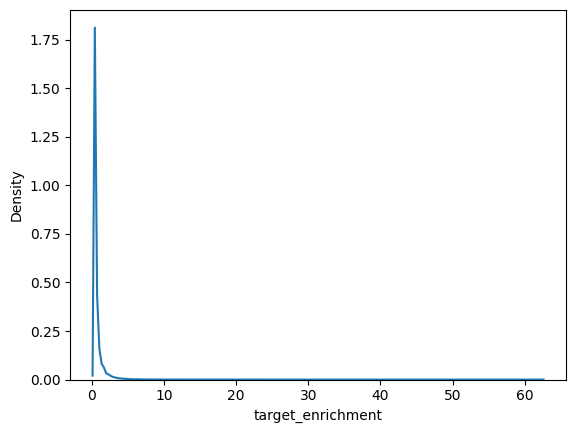

: 

In [51]:
sns.kdeplot(df_ddr1_1M["target_enrichment"])

<Axes: xlabel='target_enrichment', ylabel='Density'>

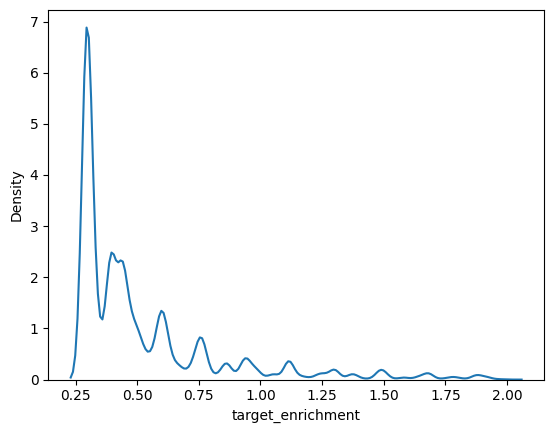

In [41]:
sns.kdeplot(df_ddr1_1M.loc[(df_ddr1_1M["target_enrichment"] >= 0) & (df_ddr1_1M["target_enrichment"] <= 2), "target_enrichment"])

<Axes: xlabel='target_enrichment', ylabel='Density'>

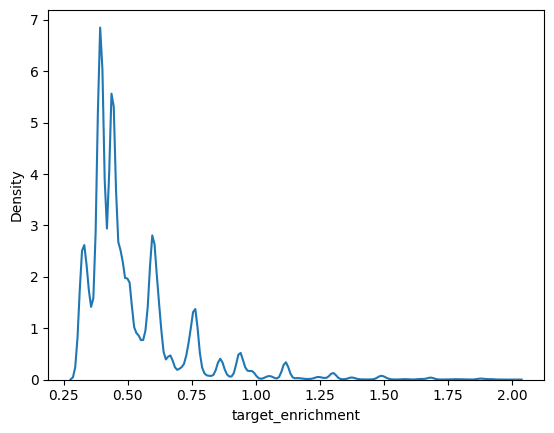

In [42]:
sns.kdeplot(df_mapk14_1M.loc[(df_mapk14_1M["target_enrichment"] >= 0) & (df_mapk14_1M["target_enrichment"] <= 2), "target_enrichment"])

In [44]:
df_ddr1_1M.loc[(df["target_enrichment"] >= 0) & (df["target_enrichment"] <= 2), "target_enrichment"].count()


np.int64(956918)

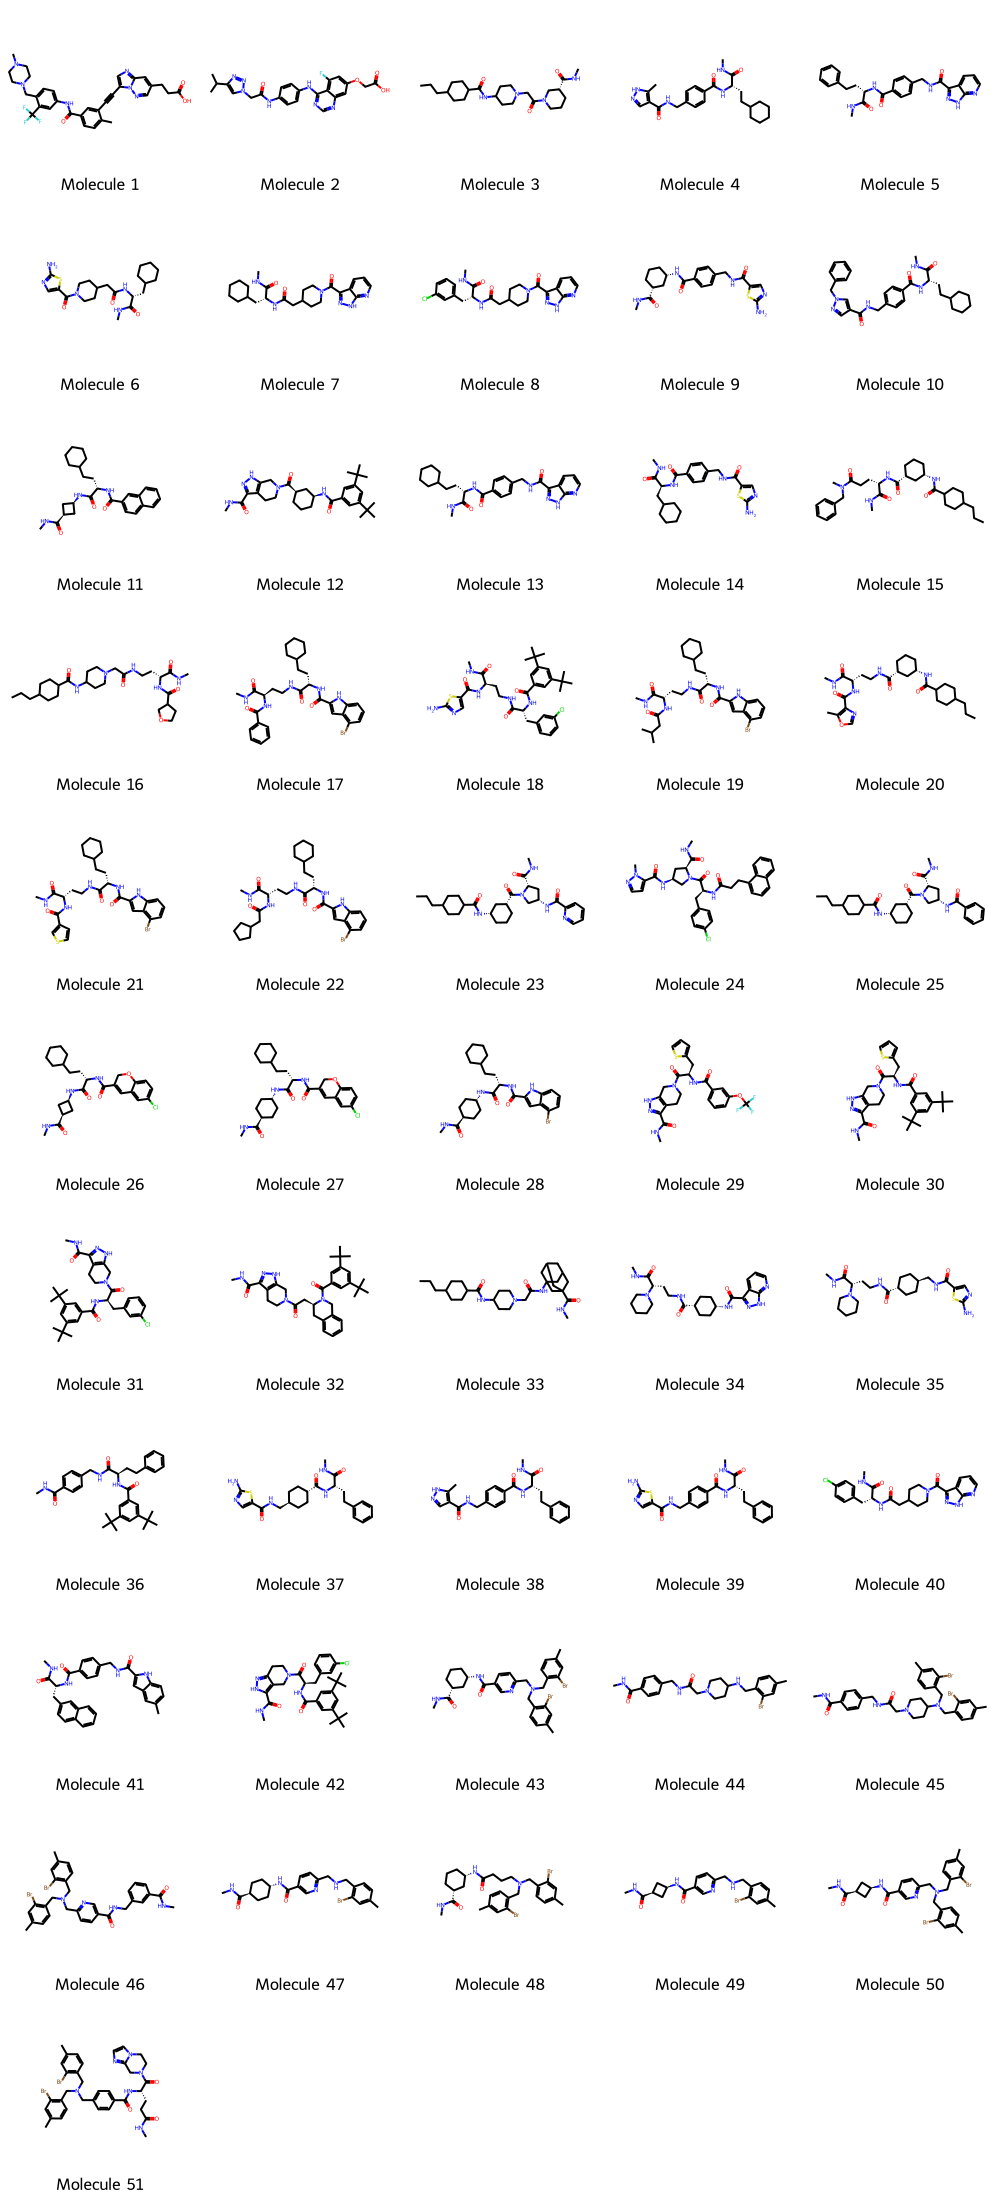

In [11]:
smiles_list = pd.read_csv("./data/heldout/ddr1_offdna.csv")["smiles"]
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200,200), legends=[f"Molecule {i+1}" for i in range(len(mols))], maxMols=100)
display(img)
#img.save("ddr1_offdna_molecules.png")